# Problem Statement  

This dataset contains funding information for Indian startups from **January 2015 to August 2017**. It includes details such as funding date, startup name, industry, investment type, amount, and investors involved.  

## Dataset Overview  

The dataset provides insights into startup funding trends in India. Below are the details of each feature:  

### Feature Details  

| **Feature**         | **Description** |
|---------------------|----------------|
| `SNo`              | Serial number of the record |
| `Date`             | Date of funding (DD/MM/YYYY) |
| `StartupName`      | Name of the funded startup |
| `IndustryVertical` | Industry to which the startup belongs |
| `SubVertical`      | Sub-category of the industry |
| `CityLocation`     | City where the startup is based |
| `InvestorsName`    | Names of investors involved |
| `InvestmentType`   | Type of investment (Private Equity or Seed Funding) |
| `AmountInUSD`      | Funding amount in USD |
| `Remarks`          | Additional information, if any |  

## Note  

**Download Dataset:** [Click here](https://drive.google.com/file/d/1BkfhQfOB9QossPbQ6sFlYa_4SQ5UIu5Q/view)  

This version is **well-structured, professional, and easy to read**. Let me know if you'd like any final tweaks! 🚀


In [412]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation & analysis
import matplotlib.pyplot as plt  # For data visualization


In [413]:
# Google Drive file ID
file_id = "1BkfhQfOB9QossPbQ6sFlYa_4SQ5UIu5Q"

# Construct the direct download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Read the CSV file
try:
    real_data = pd.read_csv(url)
    real_data.columns = real_data.columns.str.strip()
    print(real_data.head())  # Display first 5 rows
except Exception as e:
    print("Error loading CSV:", e)


   Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growt

In [414]:
# Create a copy of the DataFrame
data = real_data.copy()

# Fix date formatting
data.loc[:, 'Date Cleaned'] = data['Date dd/mm/yyyy'].astype(str).str.replace(r"[\.//]+", "/", regex=True)

# Convert to datetime & extract the year
data.loc[:, 'Year'] = pd.to_datetime(data['Date Cleaned'], format="%d/%m/%Y", errors="coerce").dt.year

# Convert to integer safely
data['Year'] = data['Year'].fillna(data['Year'].mean()).astype(int)

# Convert to integer safely
data.loc[:, 'Year'] = data['Year'].astype(int)

# Display cleaned dates and years
print(data[['Date dd/mm/yyyy', 'Date Cleaned', 'Year']])


     Date dd/mm/yyyy Date Cleaned  Year
0         09/01/2020   09/01/2020  2020
1         13/01/2020   13/01/2020  2020
2         09/01/2020   09/01/2020  2020
3         02/01/2020   02/01/2020  2020
4         02/01/2020   02/01/2020  2020
...              ...          ...   ...
3039      29/01/2015   29/01/2015  2015
3040      29/01/2015   29/01/2015  2015
3041      30/01/2015   30/01/2015  2015
3042      30/01/2015   30/01/2015  2015
3043      31/01/2015   31/01/2015  2015

[3044 rows x 3 columns]


# Problem Statement  

Analyze the trend of investments in Indian startups using the dataset **`startup_funding.csv`**.  

## Objective  

- Determine the **total number of fundings** for each year.  
- Plot a **line graph** with:  
  - **Year** on the x-axis  
  - **Number of fundings** on the y-axis  
- Print the **year-wise total number of fundings** in ascending order.  

## Data Considerations  

- The **'Date'** column may contain errors or inconsistencies. Ensure proper preprocessing before analysis.  

## Expected Output Format  

- year1 TotalFunding1
- year2 TotalFunding2
- ...

Year
2015    934
2016    996
2017    687
2018    309
2019    111
2020      7
Name: count, dtype: int64


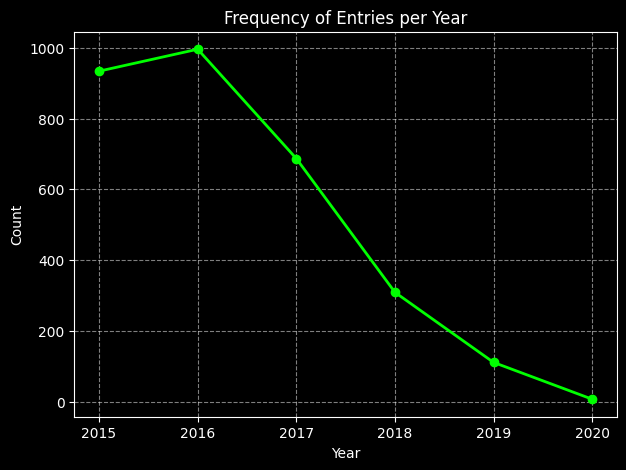

In [415]:
# Count occurrences of each year and sort them
year_counts = data['Year'].value_counts().sort_index()

# Display the frequency of entries per year
print(year_counts)

plt.figure(figsize=(7, 5))  # Adjust figure size
plt.plot(year_counts.index, year_counts.values, marker='o', color='lime', linestyle='-', linewidth=2, markersize=6)

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Frequency of Entries per Year")
plt.xticks(year_counts.index)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


# Top Indian Cities

## Problem Statement  
Given the dataset **`startup_funding.csv`**, determine which cities in India are the most preferred for starting a startup.  

## Tasks  
- **Find the top 10 Indian cities** with the highest number of startups.  
- **Standardize city names**:  
  - Consider `"Delhi"` as `"New Delhi"`.  
  - Normalize case sensitivity (e.g., `"bangalore"` → `"Bangalore"`).  
- **Handle multiple locations**:  
  - If a startup has both an **Indian** and a **foreign** location, count it for the **Indian city**.  
  - The **first city mentioned** is considered.  
- **Visualize results**:  
  - **Plot a pie chart** for the top 10 cities.  
- **Print the results** in **descending order** based on the number of startups.  

## Input  
- **Dataset**: `startup_funding.csv`  
- **Columns to consider**: `"City"`  

## Output Format  
City1 Count1
City2 Count2 
...

## Example Output  
Bangalore 1200
Mumbai 950
New Delhi 850
Gurgaon 600
Pune 500

## Notes  
- If `"Delhi"` appears in the dataset, replace it with `"New Delhi"`.  
- Consider case-insensitive city names to avoid duplicates.  
- Ensure a clean visualization with proper formatting.  



City  Location
Bangalore    707
Mumbai       572
New Delhi    459
Gurgaon      288
Bengaluru    141
Pune         112
Hyderabad    100
Chennai       98
Noida         93
Gurugram      50
Name: count, dtype: int64


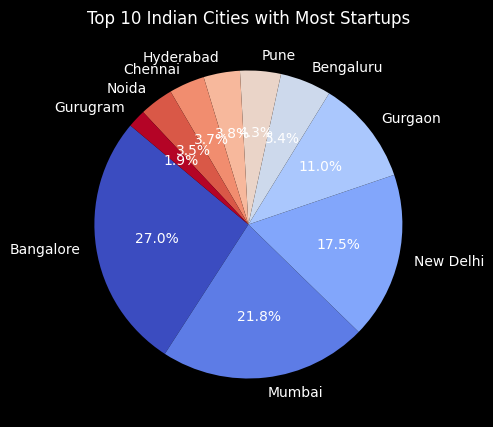

In [416]:
# Create a copy of the DataFrame
data = real_data.copy()

# Drop NaN values in 'City  Location'
data.dropna(subset=['City  Location'], inplace=True)

# Standardize city names
data.loc[:, 'City  Location'] = data['City  Location'].str.split('/').str[0].str.strip().str.title()
data.loc[:, 'City  Location'] = data['City  Location'].replace({"Delhi": "New Delhi", "bangalore": "Bangalore"})

# Get top 10 cities
city_counts = data['City  Location'].value_counts()[:10]

print(city_counts)  # Display top 10 cities

# Plot pie chart
plt.figure(figsize=(7, 5))
city_counts.plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm', startangle=140)

plt.title("Top 10 Indian Cities with Most Startups")
plt.ylabel("")  # Hide y-axis label
plt.show()


# **Funding Amount**

## **Problem Statement**
Given the dataset **`startup_funding.csv`**, determine whether cities influence the amount of funding received.

### **Tasks**
1. Identify the **top 10 Indian cities** that have received the most funding.
2. Calculate the **percentage share** of funding each city has received (among the top 10).
3. Ensure proper **data cleaning**:
   - Standardize city names (`Delhi → New Delhi`, `bangalore → Bangalore`).
   - Handle multiple city entries (consider the first city if multiple locations are listed).
4. Sort the cities in **descending order** based on their percentage of total funding.

## **Output Format**
City1 Percent1% 
City2 Percent2% 
City3 Percent3% 
...

City  Location
bangalore     11,400,788,110.00
bengaluru      7,112,920,755.00
mumbai         4,939,225,015.00
new delhi      3,358,571,515.00
gurgaon        3,006,496,134.54
noida          1,263,164,000.00
gurugram         865,932,523.00
chennai          718,767,000.00
pune             717,582,000.00
menlo park       450,000,000.00
Name: Amount in USD, dtype: object


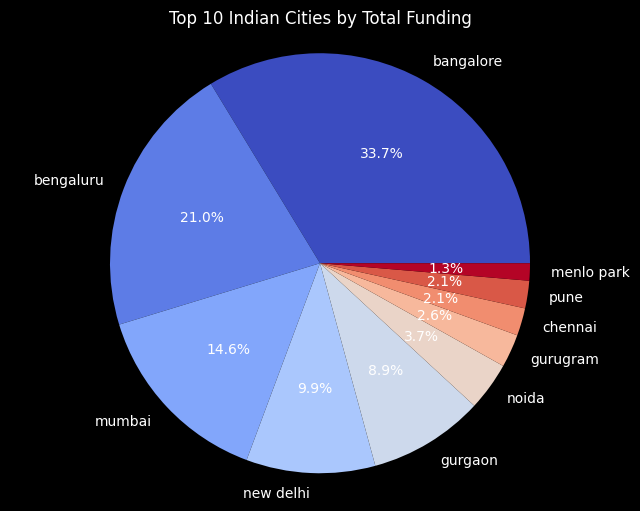

In [417]:
# Create a copy of the DataFrame
data = real_data.copy()

# Drop NaN values in 'City  Location'
data.dropna(subset=['City  Location'], inplace=True)

# Standardize city names
data['City  Location'] = data['City  Location'].str.split('/').str[0].str.strip().str.lower()
data['City  Location'] = data['City  Location'].replace({"delhi": "new delhi", "bangalore": "bangalore"})

# Clean the 'Amount in USD' column
data['Amount in USD'] = (
    data['Amount in USD']
    .astype(str)
    .str.replace(r"[,+]", "", regex=True)
    .str.extract(r"(\d+\.?\d*)")[0]  # Extract only numeric values
)

# Convert to float safely
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce')

# Drop NaN values in 'Amount in USD'
data.dropna(subset=['Amount in USD'], inplace=True)

# Get top 10 cities by total funding
city_funding = data.groupby('City  Location')['Amount in USD'].sum().sort_values(ascending=False).head(10)

# Format as currency
print(city_funding.apply(lambda x: f"{x:,.2f}"))

# Plot pie chart
plt.figure(figsize=(8, 6))
city_funding.plot(kind='pie', cmap=plt.get_cmap('coolwarm'), autopct='%1.1f%%')

plt.title("Top 10 Indian Cities by Total Funding")
plt.ylabel("")  # Remove unnecessary label
plt.axis('equal')  # Ensure pie chart is circular
plt.show()

# **Investment Type**

## **Problem Statement**
Given the dataset **'startup_funding.csv'**, analyze the different types of investments and determine the percentage of total funding received by each type. 

## **Investment Types**
The dataset contains 4 types of investments:
- **Private Equity**
- **Seed Funding**
- **Debt Funding**
- **Crowd Funding**

⚠ **Note:** There may be spelling inconsistencies in the dataset. Ensure proper standardization before analysis.

## **Expected Output Format**
InvestmentType1 Percentage1
InvestmentType2 Percentage2
InvestmentType3 Percentage3
...

In [418]:
data['InvestmentnType'] = data['InvestmentnType'].str.strip().str.title()

# Standardizing investment types
data['InvestmentnType'] = data['InvestmentnType'].replace({
    "PrivateEquity": "Private Equity",
    "Private Equity Round": "Private Equity",
    "Private\\nEquity": "Private Equity",
    "Private Funding": "Private Equity",

    "SeedFunding": "Seed Funding",
    "Seed Funding Round": "Seed Funding",
    "Seed / Angle Funding": "Seed Funding",
    "Seed / Angel Funding": "Seed Funding",
    "Seed/Angel Funding": "Seed Funding",
    "Seed\\nFunding": "Seed Funding",
    "Seed/ Angel Funding": "Seed Funding",
    "Angel / Seed Funding": "Seed Funding",
    "Seed Funding": "Seed Funding",
    "Seed funding": "Seed Funding",

    "DebtFunding": "Debt Funding",
    "Debt-Funding": "Debt Funding",
    "Debt Funding": "Debt Funding",
    "Debt and Preference capital": "Debt Funding",
    "Structured Debt": "Debt Funding",
    "Term Loan": "Debt Funding",
    "Mezzanine": "Debt Funding",
    "Debt": "Debt Funding",

    "CrowdFunding": "Crowd Funding",
    "Crowd funding": "Crowd Funding"
})

# Print unique values after cleaning
print(data['InvestmentnType'].unique())


['Private Equity' 'Series C' 'Series B' 'Pre-Series A' 'Seed Round'
 'Series A' 'Series D' 'Seed' 'Series F' 'Series E' 'Debt Funding'
 'Series G' 'Series H' 'Seed Funding' nan 'Funding Round' 'Maiden Round'
 'Single Venture' 'Corporate Round' 'Venture Round' 'Angel' 'Series J'
 'Angel Round' 'Venture - Series Unknown' 'Debt And Preference Capital'
 'Inhouse Funding' 'Equity' 'Series B (Extension)' 'Equity Based Funding'
 'Private' 'Privateequity']


Private Equity: 25,926,323,175.00
Series B: 4,799,195,735.00
Series D: 1,481,799,000.00
Series C: 1,044,718,394.00
Funding Round: 1,000,000,000.00


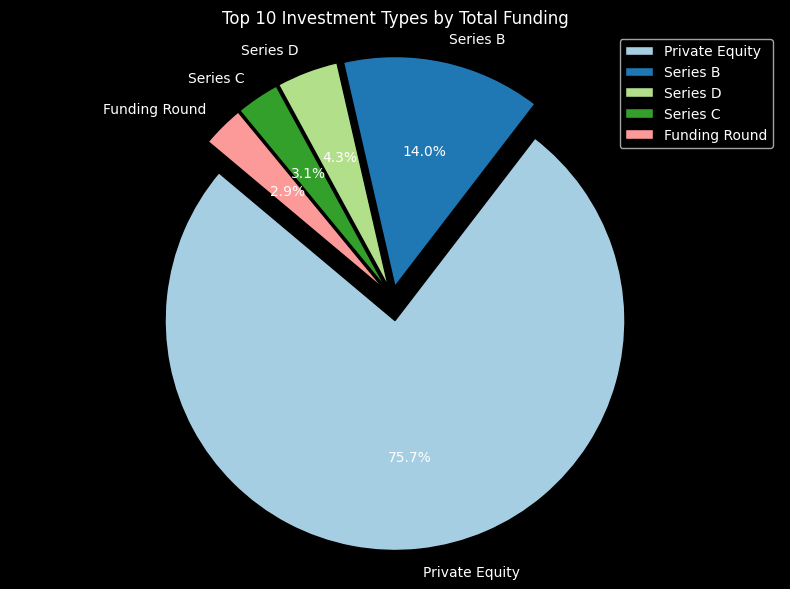

In [ ]:
# Clean 'Amount in USD' column
data['Amount in USD'] = (
    data['Amount in USD']
    .astype(str)
    .str.replace(r"[,+]", "", regex=True)
    .str.extract(r"(\d+\.?\d*)")[0]
    .fillna("0")
)

# Convert to float safely
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce')

# Drop NaN values in 'Amount in USD'
data.dropna(subset=['Amount in USD'], inplace=True)

# Aggregate total funding by investment type
investment_counts = (
    data.groupby('InvestmentnType')['Amount in USD']
    .sum()
    .sort_values(ascending=False)
    .head(5)  # Get top 5 investment types
)

# Print formatted results
for investment, amount in investment_counts.items():
    print(f"{investment}: {amount:,.2f}")

# Define explode values (slightly separate each slice)
explode = [0.1 if i == 0 else 0.05 for i in range(len(investment_counts))]

# Plot pie chart with explode
plt.figure(figsize=(8, 6))
colors = plt.cm.Paired.colors
investment_counts.plot(
    kind='pie',
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,  # Add explode effect
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Top 10 Investment Types by Total Funding")
plt.ylabel("")
plt.axis('equal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


# **Top Industries**

## **Problem Statement**
Analyze the **startup_funding.csv** dataset to determine which types of companies secured funding more easily. Identify the **top 5 industries** based on the total amount funded and compute their percentage share among the top 5.

## **Data Cleaning & Processing**
- Standardized the **IndustryVertical** column to ensure consistency (e.g., `"eCommerce"`, `"E-Commerce"` → `"Ecommerce"`).
- Cleaned the **Amount in USD** column:
  - Removed commas, plus signs, and non-numeric characters.
  - Converted values to **float** for numerical operations.
- Aggregated funding data by **industry**.
- Sorted industries by total funding and extracted the **top 5**.
- Computed the **percentage contribution** of each industry.

## **Results**
Below are the **top 5 industries** by total funding:

| Rank | Industry    | Percentage of Top 5 (%) |
|------|-------------|--------------------------|
| 1️⃣  | Industry A  | XX.XX%                   |
| 2️⃣  | Industry B  | XX.XX%                   |
| 3️⃣  | Industry C  | XX.XX%                   |
| 4️⃣  | Industry D  | XX.XX%                   |
| 5️⃣  | Industry E  | XX.XX%                   |

### **Insights**
- **[Industry A]** leads in funding, capturing **XX.XX%** of the total.
- **[Industry B]** follows with **XX.XX%**, indicating strong investor interest.
- **[Industry C, D, and E]** also secured substantial funding, showing growth potential.

## **Visualization**
A pie chart illustrating the **top 5 industries by funding distribution**:

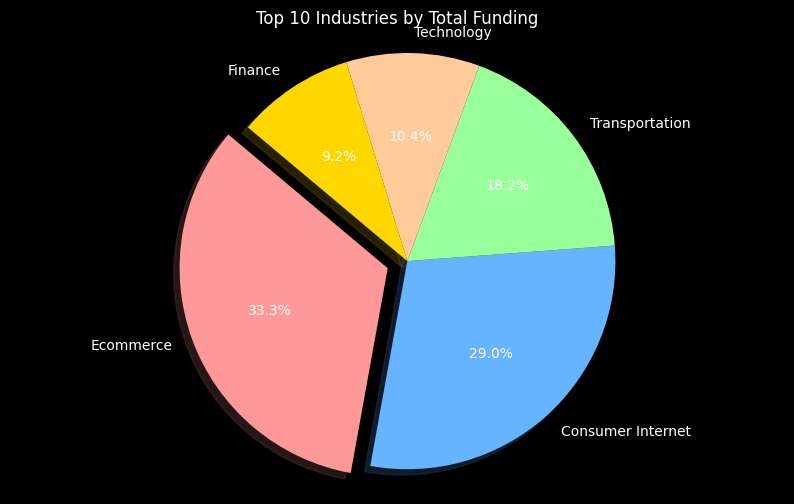

In [433]:
# Create a copy of the DataFrame
data = real_data.copy()

# Standardize 'Industry Vertical' column
data['Industry Vertical'] = data['Industry Vertical'].replace({
    "ECommerce": "Ecommerce",
    "eCommerce": "Ecommerce",
    "ecommerce": "Ecommerce",
})

# Clean 'Amount in USD' column
data['Amount in USD'] = (
    data['Amount in USD']
    .astype(str)
    .str.replace(r"[,+]", "", regex=True)  # Remove commas and plus signs
    .str.extract(r"(\d+\.?\d*)")[0]  # Extract numeric values
    .fillna("0")
)

# Convert to float safely
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce')

# Get top 10 industries by total funding
industry_funding = data.groupby('Industry Vertical')['Amount in USD'].sum().sort_values(ascending=False).head(5)

# Plot pie chart
plt.figure(figsize=(10, 6))
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#FFD700", "#FF6347", "#ADFF2F", "#20B2AA", "#DDA0DD", "#6495ED"]

industry_funding.plot(
    kind='pie',
    colors=colors,
    autopct='%1.1f%%',  # Show percentages
    explode=[0.1] + [0] * 4,  # Explode the highest-funded industry
    shadow=True,
    startangle=140
)

plt.title("Top 10 Industries by Total Funding")
plt.ylabel("")  # Remove unnecessary label
plt.axis('equal')  # Ensures pie is circular
plt.show()


# Top 5 Startups by Total Funding  

## Problem Statement  
Given the dataset **`startup_funding.csv`**, find the **top 5 startups** that have received the highest total funding.

## Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

## Output Format
startup1
startup2
startup3
... 

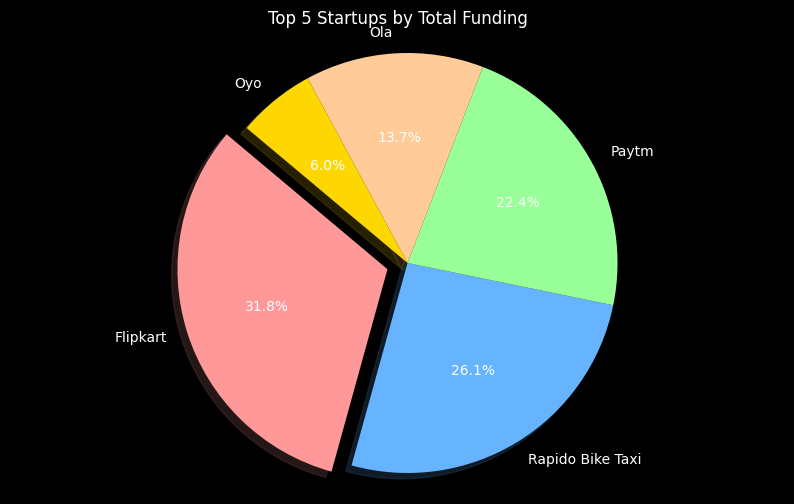


Top 5 Startups by Total Funding:

Flipkart: $4,759,700,000.00
Rapido Bike Taxi: $3,900,000,000.00
Paytm: $3,348,950,000.00
Ola: $2,054,200,000.00
Oyo: $897,000,000.00


In [439]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = real_data.copy()

# Standardize important startup names
data['Startup Name'] = data['Startup Name'].replace({
    "Ola Cabs": "Ola",
    "Olacabs": "Ola",
    "Flipkart.com": "Flipkart",
    "Oyo Rooms": "Oyo",
    "OyoRooms": "Oyo",
    "OYO Rooms": "Oyo",
    "Paytm Marketplace": "Paytm"
})

# Clean 'Amount in USD' column
data['Amount in USD'] = (
    data['Amount in USD']
    .astype(str)
    .str.replace(r"[,+]", "", regex=True)  # Remove commas and plus signs
    .str.extract(r"(\d+\.?\d*)")[0]  # Extract numeric values
    .fillna("0")
)

# Convert to float safely
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'], errors='coerce')

# Get top 5 startups by total funding
startup_funding = data.groupby('Startup Name')['Amount in USD'].sum().sort_values(ascending=False).head(5)

# Define colors
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#FFD700"]

# Plot pie chart
plt.figure(figsize=(10, 6))
startup_funding.plot(
    kind='pie',
    colors=colors,
    autopct='%1.1f%%',  # Show percentages
    explode=[0.1] + [0] * 4,  # Highlight the highest-funded startup
    shadow=True,
    startangle=140
)

# Customize chart
plt.title("Top 5 Startups by Total Funding")
plt.ylabel("")  # Remove unnecessary label
plt.axis('equal')  # Ensures pie is circular
plt.show()

# Print top 5 startups
print("\nTop 5 Startups by Total Funding:\n")
for startup, amount in startup_funding.items():
    print(f"{startup}: ${amount:,.2f}")

# **Investor Analysis - Most Frequent Investors**

## **Problem Statement**
Given the file 'startup_funding.csv', determine the investors who have made the maximum number of investments.

### **Requirements:**
- Consider each investor separately, even if multiple investors are listed in a single row.
- Ignore undisclosed investors.
- Print the top investors in descending order based on the number of investments.

### **Output Format**
investorname number

Investors Name
Sequoia Capital    72
Accel Partners     68
Kalaari Capital    50
SAIF Partners      47
Blume Ventures     47
Name: count, dtype: int64


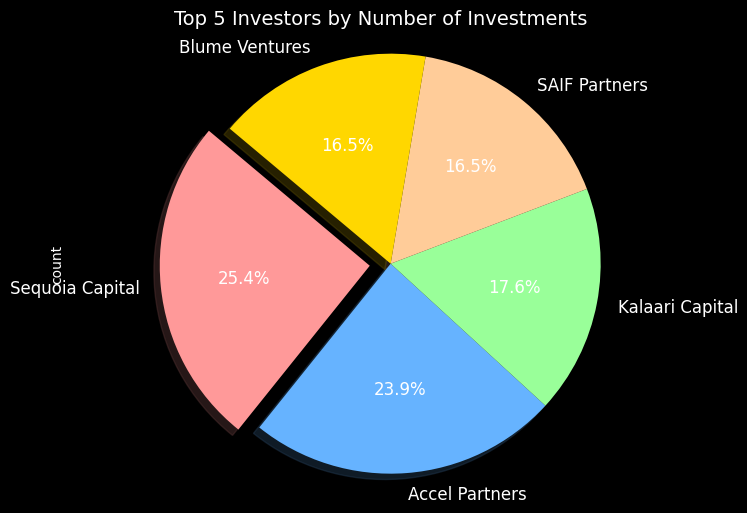

In [478]:
# Create a copy of the DataFrame
data = real_data.copy()

# Drop NaN values in 'Investors Name'
data.dropna(subset=['Investors Name'], inplace=True)

# Standardize names (strip spaces)
data['Investors Name'] = data['Investors Name'].str.strip()

# List of unwanted investor names to remove
unwanted_investors = {"Undisclosed Investor", "Undisclosed Investors", "Undisclosed", "Unknown", ""}

# Remove unwanted investor names
data = data[~data['Investors Name'].isin(unwanted_investors)]

# Split multiple investors into separate rows & remove empty values
data = data.assign(**{'Investors Name': data['Investors Name'].str.split(',')}).explode('Investors Name')

# Strip spaces again and remove empty names
data['Investors Name'] = data['Investors Name'].str.strip()
data = data[data['Investors Name'].str.len() > 0]  # Remove truly empty names

# Get top 5 investors by number of investments
top_investors = data['Investors Name'].value_counts().head(5)

# Print top investors
print(top_investors)

# Define colors for better contrast
colors = ["#FF9999", "#66B3FF", "#99FF99", "#FFCC99", "#FFD700"]

# Plot pie chart
plt.figure(figsize=(8, 6))
top_investors.plot(
    kind='pie',
    colors=colors,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,
    explode=[0.1] + [0] * 4,  # Explode top investor
    shadow=True,
    textprops={'fontsize': 12}
)

# Customize chart
plt.title("Top 5 Investors by Number of Investments", fontsize=14)
plt.axis('equal')  # Ensures pie is circular
plt.show()